In [1]:
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv("Monthly Rainfall Index and Flood Probability Kerala.csv")

df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [10]:
df['FLOODS'] = df['FLOODS'].replace('YES', 1)
df['FLOODS'] = df['FLOODS'].replace('NO', 0)
df.drop(['SUBDIVISION', ' ANNUAL RAINFALL'], axis=1, inplace=True)

In [11]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,0


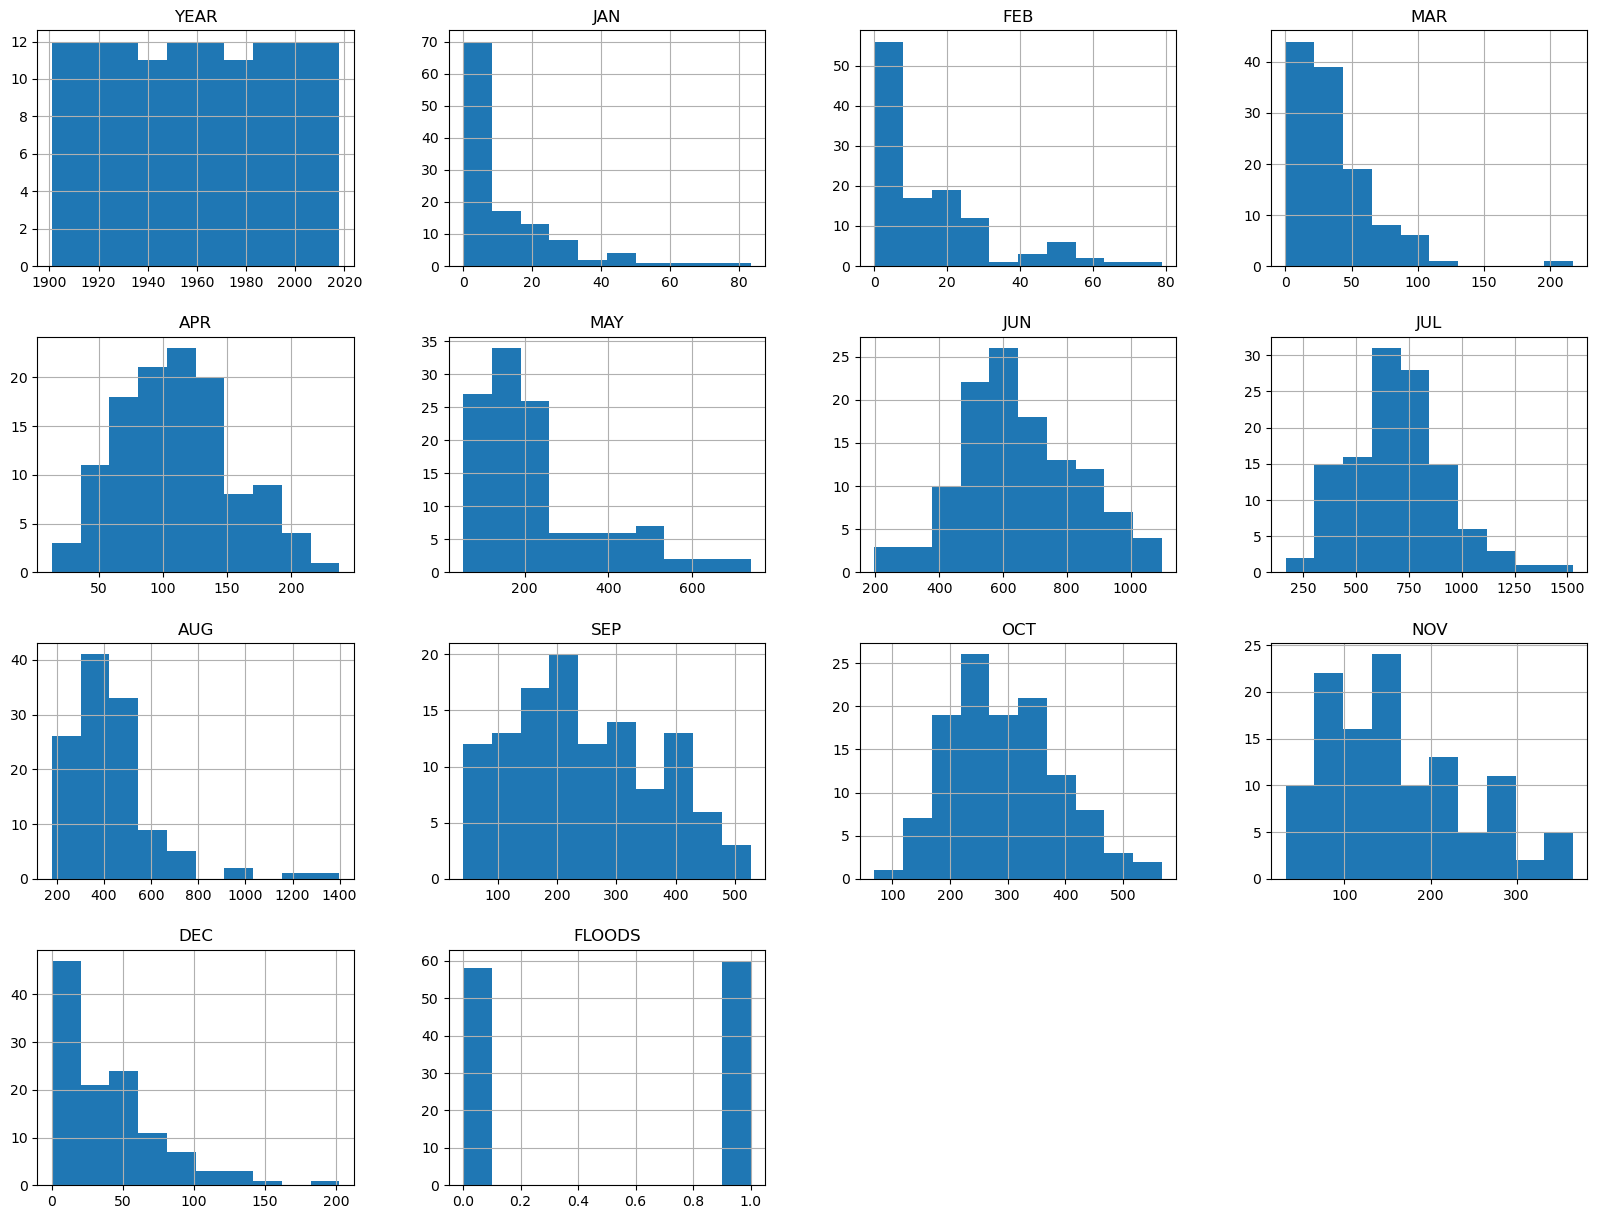

In [13]:
df.hist(bins=10, figsize=(20,15))
plt.show()

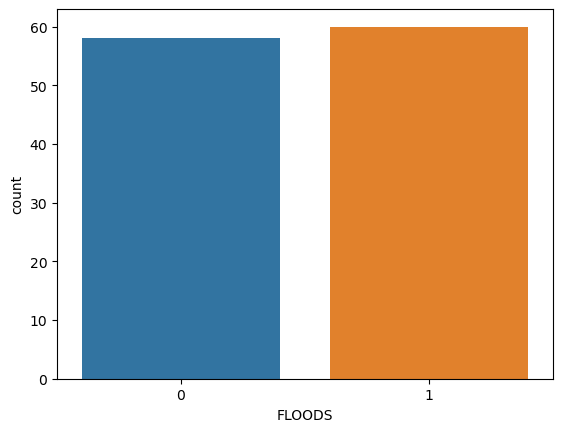

In [15]:
sns.countplot(data=df,x='FLOODS')
plt.show()

In [12]:
corr_matrix = df.corr()
corr_matrix['FLOODS'].sort_values(ascending=False)

FLOODS    1.000000
JUL       0.442774
JUN       0.442531
SEP       0.376385
AUG       0.286690
MAY       0.242813
NOV       0.238852
JAN       0.145313
MAR       0.086739
OCT       0.060088
DEC       0.054326
APR       0.034392
FEB      -0.035730
YEAR     -0.202548
Name: FLOODS, dtype: float64

<AxesSubplot:>

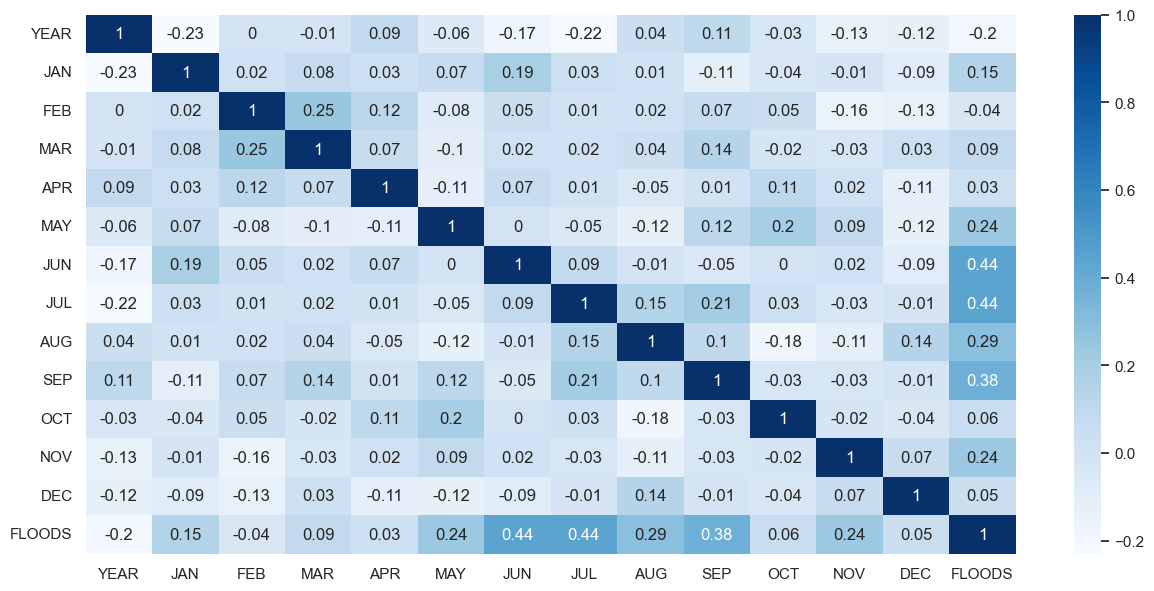

In [26]:
corr_matrix = df.corr().round(2)
sns.set(font_scale=1)
plt.figure(figsize = (15,7))
sns.heatmap(corr_matrix, annot = True, cmap='Blues')

In [28]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,0


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[num_standard] = std_scaler.fit_transform(X_train[num_standard])
X_train[num_min_max] = min_max_scaler.fit_transform(X_train[num_min_max])

X_test[num_standard] = std_scaler.transform(X_test[num_standard])
X_test[num_min_max] = min_max_scaler.transform(X_test[num_min_max])